# Getting started

In [ ]:
!pip install mongoengine
!pip install dnspython
!pip install pymongo[srv,tls]

In [ ]:
# Doc:
# https://pymongo.readthedocs.io/en/stable/
# https://mongoengine-odm.readthedocs.io/
# MongoDB as a service:
# https://cloud.mongodb.com/
# https://mlab.com/
from mongoengine import connect, StringField, IntField, Document

One of the main advantages of MongoDB using the JSON format is the interoperability that this provides with programming languages that use a similar format. This makes working with data in an application and storing/retrieving it from a database near seamless.
A better way of integrating a database into code is to use a method such as Object Relational Mapping (ORM), or in the case of MongoDB an Object Document Mapper (ODM). This works by translating Python (or some other languages) code into MongoDB statements to retrieve data. This data is then passed back into Python objects. This has the advantage of ensuring that you only need to use one language (e.g. Python) to access and use the database.
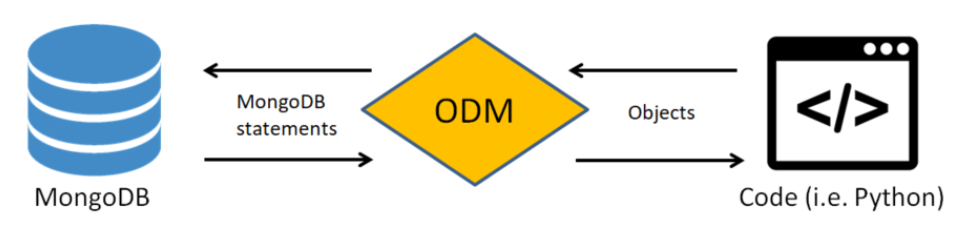

A good library for doing this is **mongoengine**. Here we import the library and connect to a Mongo client which we will call **odm_patients**.

In [ ]:
client = connect(username='user', 
                 password='demo', 
                 db='odm_patients',
                 port=27017,
                 ssl=True,
                 replicaSet='atlas-5ciesg-shard-0',
                 authentication_source = 'admin',
                 retryWrites=True,
                 w="majority",
                 host="mongodb://practicas-shard-00-00.jb7nl.mongodb.net:27017,practicas-shard-00-01.jb7nl.mongodb.net:27017,practicas-shard-00-02.jb7nl.mongodb.net:27017")

The following example shows how we can create a Python class to model some data, create a few instances of that class and write this to a database. Following the previous example we will create a class to store data about patients.

In [ ]:
class Patient(Document):
    patient_id = StringField(required=True)
    name = StringField()
    age = IntField()
    sex = StringField(max_length=1)
    heart_rate = IntField()

We can use a Python class to create an object to manipulate the database. Here we create the data items by specifying what sort of field they are. For example textual/string data can be created using a **StringField()** function and integers with **IntField()**. Additional parameters can also be added such as the amount of characters in a string and if a field cannot be null/empty.

We can now create instances of this class in the standard way in Python. Here we can create a couple of patients called Maxine and Hamza. Note that we add the **save()** function to the end of the line to write this data to the database.

In [ ]:
maxine_patient = Patient(patient_id = "342453", name = "Maxine Smith", age = 47, sex = "F", heart_rate = 67).save()
hamza_patient = Patient(patient_id = "543243", name = "Hamza Khan", age = 22, sex = "M", heart_rate = 73).save()

We can output these objects using a loop. To access specific fields we can use the iterator, a dot and then the field we wish to output. For example the patients name, id and age.

In [ ]:
for patient in Patient.objects:
    print(patient.name, patient.patient_id, patient.age)

# Closing connection to the DB

Finally, close the client to the server.

In [ ]:
from mongoengine.connection import disconnect_all
disconnect_all()
# client.close()